In [3]:
import numpy as np
import matplotlib.pylab as plt
import os
import glob
import seaborn as sns
import sys 
import re
import pandas as pd
sys.path.append('C:/Users/sophi/OneDrive/Dokumente/bsc_project/code/')
from functions import *
# # sys.path.append('/home/angela/Dropbox/Work/sharks/code/')
# sys.path.append('/Users/ang/Dropbox/Work/sharks/code/')

# from functions import *

### Paths

In [15]:
pc = 'windows'
if pc == 'linux':
    basevol = '/home/angela/'
else:
    basevol = 'E:/sophia'

### Define base path where files are
datapath = basevol + "/excercises/drone_log/"
videopath = basevol + "/files/videofiles/"
filename = '/sequence_20240303_070126703_DJI_0257'
### List all settings files inside the folder
# files_list_settings = np.sort(glob.glob(basepath + file + ".settings"))

# print(files_list_settings)
# Extract the filename without the path
# filename_with_extension = os.path.basename(files_list_settings[0])
# Remove the extension if present
# filename = os.path.splitext(file)[0]

### Path settings file
settings_file_path = datapath + filename + ".settings"
### Path text file
txt_file_sequence = datapath + filename + ".txt"

### Read cm_per_px calibration at frame 0

In [16]:
cm_per_pixel = get_trex_settings_value(settings_file_path,'cm_per_pixel')
print(cm_per_pixel)
w,h = 5120,2700

0.38374


In [17]:
### Calculate FOV in centimeters
fov_size_w = w*cm_per_pixel
fov_size_h = h*cm_per_pixel
print(f'Width in cm is',fov_size_w)
print(f'Height in cm is',fov_size_h)
print(f'Width in m is',fov_size_w/100)
print(f'Height in m is',fov_size_h/100)

Width in cm is 1964.7488
Height in cm is 1036.098
Width in m is 19.647488
Height in m is 10.36098


### 1) Read in altitude info from all SRT files

In [18]:
txt_file_sequence

'E:/sophia/excercises/drone_log//sequence_20240303_070126703_DJI_0257.txt'

In [19]:
# Initialize an empty list to store filenames
files_sequence = []

# Open the text file containing the filenames
with open(txt_file_sequence, 'r') as file:
    # Read the contents of the file line by line
    for line in file:
        # Strip any leading/trailing whitespace (including newline characters)
        line = line.strip()
        # Remove the 'file' prefix if it exists
        if line.startswith('file '):
            line = line[5:]
        # Split the filename and extension
        file_base, _ = os.path.splitext(line)
        # Append the base filename (without extension) to the list
        files_sequence.append(file_base)

# Print the list of filenames without 'file' prefix and extensions
print(files_sequence)

['20240303_070126703_DJI_0257', '20240303_070430103_DJI_0258', '20240303_070733702_DJI_0259', '20240303_071037222_DJI_0260', '20240303_071340742_DJI_0261', '20240303_071644282_DJI_0262', '20240303_071947882_DJI_0263', '20240303_072251382_DJI_0264', '20240303_072554863_DJI_0265']


In [20]:
for f in files_sequence:
    print(f)

20240303_070126703_DJI_0257
20240303_070430103_DJI_0258
20240303_070733702_DJI_0259
20240303_071037222_DJI_0260
20240303_071340742_DJI_0261
20240303_071644282_DJI_0262
20240303_071947882_DJI_0263
20240303_072251382_DJI_0264
20240303_072554863_DJI_0265


In [22]:
srt_folder = datapath + 'srt_files/'
srt_files = np.sort(glob.glob(srt_folder + "*.SRT"))
print(srt_files)

['E:/sophia/excercises/drone_log/srt_files\\20240303_070126703_DJI_0257.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240303_070430103_DJI_0258.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240303_070733702_DJI_0259.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240303_071037222_DJI_0260.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240303_071340742_DJI_0261.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240303_071644282_DJI_0262.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240303_071947882_DJI_0263.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240303_072251382_DJI_0264.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240303_072554863_DJI_0265.SRT'
 'E:/sophia/excercises/drone_log/srt_files\\20240305_065328211_DJI_0260.SRT']


In [23]:
# Initialize list to store all data
data = []

# Loop through each filename in the sequence and parse the SRT files
for filename in files_sequence:
    df = parse_srt_file(filename) ### This function is at the beginning of this notebook
    
    # Append the DataFrame to the data list if it's not empty
    if not df.empty:
        data.append(df)

# Combine all data into a single DataFrame if there is any data
if data:
    combined_df = pd.concat(data, ignore_index=True)
    combined_df['frame'] = combined_df['frame'].astype(int)

    # Calculate the srt_time_line based on the last frame count
    srt_time_line = combined_df['frame'].values[-1] * 20  # Last frame times 20 milliseconds to find the corresponding part on the flight log

    # Display the DataFrame (Uncomment the following line if you want to print the DataFrame)
    print(f'SRT time line: {srt_time_line}')
else:
    print("No valid data found.")

SRT time line: 33920


In [24]:
files_sequence

['20240303_070126703_DJI_0257',
 '20240303_070430103_DJI_0258',
 '20240303_070733702_DJI_0259',
 '20240303_071037222_DJI_0260',
 '20240303_071340742_DJI_0261',
 '20240303_071644282_DJI_0262',
 '20240303_071947882_DJI_0263',
 '20240303_072251382_DJI_0264',
 '20240303_072554863_DJI_0265']

In [25]:
df.head()

,frame,Latitude,Longitude,Rel_Alt,Abs_Alt,filename
0,1.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265
1,2.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265
2,3.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265
3,4.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265
4,5.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265


### Plot abs altitude

<Axes: xlabel='frame', ylabel='Abs_Alt'>

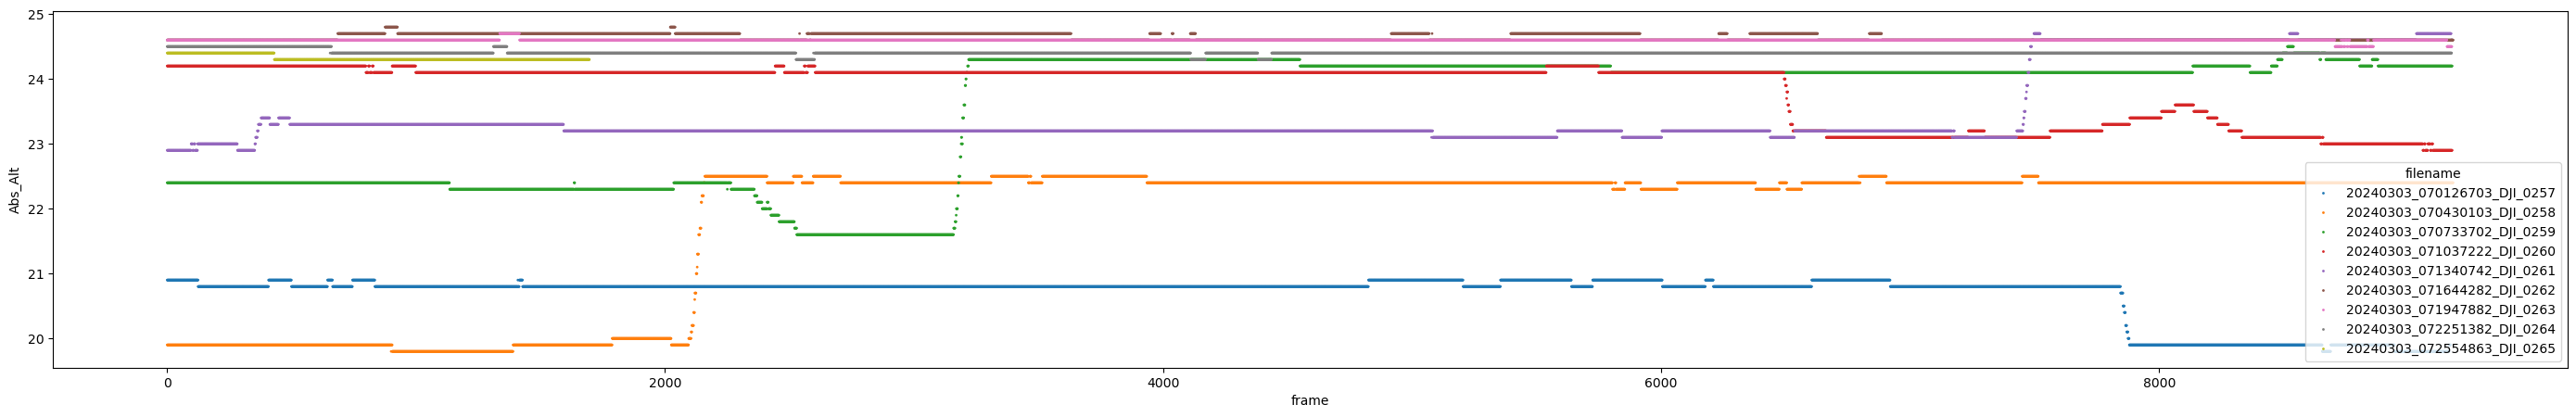

In [26]:
f,ax =plt.subplots(1,1,figsize=(35,5))
sns.scatterplot(x='frame',y='Abs_Alt',hue='filename', data = combined_df,linewidth=0,s=4)
# plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
# plt.show()

### Plot GPS coordinates altitude (probably the drone doesn't move)
Just as an excercise, try to plot the Latitude and Longitude on map such as a satellite view

<Axes: xlabel='Latitude', ylabel='Longitude'>

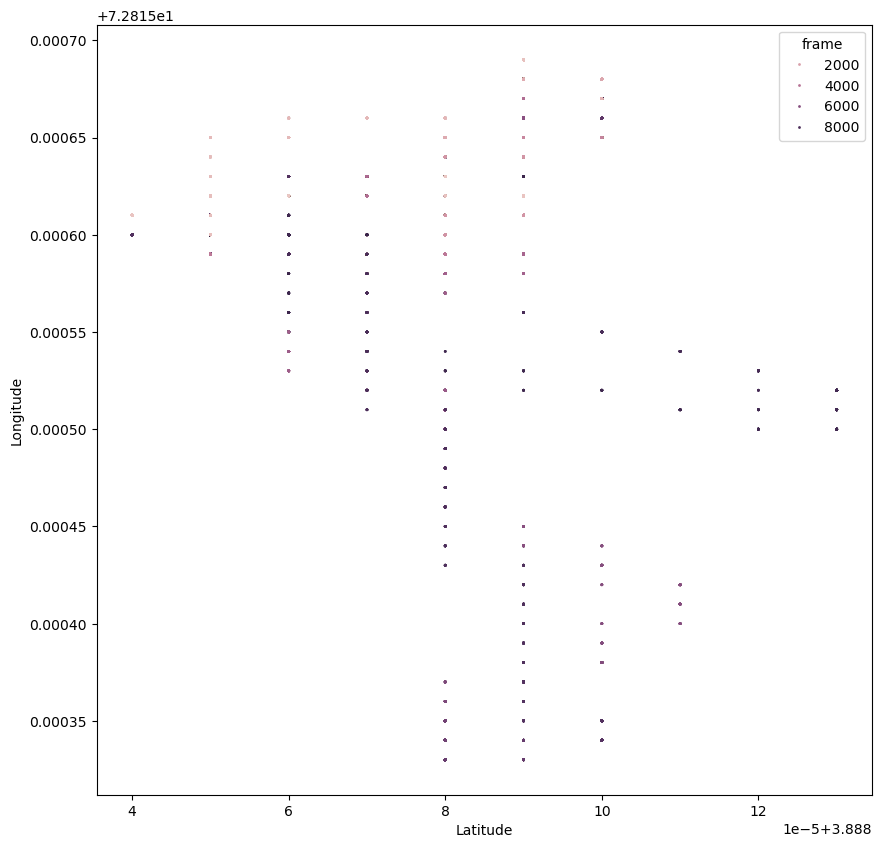

In [27]:
f,ax =plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x='Latitude',y='Longitude', hue='frame', data = combined_df,linewidth=0,s=4)

# 2- Size of marker vs. drone log altitude
As we already discussed, we would like to know how correlated the marker tracking is, with the drone log.
Here, load the dataframe created in the previous notebook where you tracked the aruco marker, and try:
- combine dataframes so that you have all the information on the same dataframe (look up pd.merge, make sure you merge on the 'frame' column)
- start plotting correlation plots between marker area vs. altitude, how correlated are they? How does the correlation change with 'filename', which is across flights?


In [28]:
# Load the DataFrame form 1-track_aruco
df1 = pd.read_hdf('E:/sophia/files/videofiles/20240303_072251382_DJI_0264_aruco.h5', 'df')


In [29]:
df.head()

,frame,Latitude,Longitude,Rel_Alt,Abs_Alt,filename
0,1.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265
1,2.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265
2,3.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265
3,4.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265
4,5.0,3.88809,72.81568,14.1,24.4,20240303_072554863_DJI_0265


In [30]:
df1.head()

,frame,ID,orientation,centroid_x,centroid_y,top_left_x,top_left_y,top_right_x,top_right_y,bottom_right_x,...,bottom_left_x,bottom_left_y,Rot Mat 0,Rot Mat 1,Rot Mat 2,Rot Mat 3,Rot Mat 4,Rot Mat 5,bottom_pixel_distance,conversion_factor
0,0,0,49.670808,1000,1022,986,1006,1017,1009,1015,...,983,1036,0.995350,0.096324,-93.793341,-0.096324,0.995350,101.076482,32.140317,0.560044
1,0,3,125.800972,816,1318,830,1301,835,1330,802,...,798,1306,0.169907,0.985460,-621.480468,-0.985460,0.169907,1898.198160,29.274562,0.614868
2,0,1,43.211830,1083,1730,1099,1744,1067,1746,1067,...,1099,1715,-0.998053,0.062378,2055.976435,-0.062378,-0.998053,3524.186684,32.015621,0.562226
3,1,0,50.648784,1000,1022,986,1006,1017,1010,1015,...,983,1036,0.991778,0.127971,-122.564573,-0.127971,0.991778,136.374357,32.140317,0.560044
4,1,3,126.706330,815,1318,829,1301,834,1331,802,...,798,1305,0.164399,0.986394,-619.052374,-0.986394,0.164399,1905.233163,30.265492,0.594737


In [31]:
#Merge the Dataframes on frame
df_filtered = combined_df[combined_df['filename'] == '20240303_072251382_DJI_0264']
df1_filtered = df1[df1['ID'].isin([0, 1, 3])]

merged_df = pd.merge(df1_filtered, df_filtered, how='inner', left_on='frame', right_on='frame')
print(merged_df)


       frame  ID  orientation  centroid_x  centroid_y  top_left_x  top_left_y  \
0          1   0    50.648784        1000        1022         986        1006   
1          1   3   126.706330         815        1318         829        1301   
2          1   1    42.224366        1082        1730        1099        1744   
3          2   0    50.648784        1000        1022         986        1006   
4          2   3   127.640171         816        1318         830        1301   
...      ...  ..          ...         ...         ...         ...         ...   
27512   9172   3   119.792154         842        1273         854        1256   
27513   9172   1    36.471520        1152        1646        1169        1659   
27514   9173   0    42.033386         987         965         971         951   
27515   9173   1    37.405357        1152        1647        1169        1660   
27516   9173   3   119.792154         842        1273         854        1256   

       top_right_x  top_rig

In [32]:
merged_df["fov_width_m"]= (merged_df["conversion_factor"]*w)/100
merged_df["fov_height_m"]= (merged_df["conversion_factor"]*h)/100

In [33]:
merged_df.head()

,frame,ID,orientation,centroid_x,centroid_y,top_left_x,top_left_y,top_right_x,top_right_y,bottom_right_x,...,Rot Mat 5,bottom_pixel_distance,conversion_factor,Latitude,Longitude,Rel_Alt,Abs_Alt,filename,fov_width_m,fov_height_m
0,1,0,50.648784,1000,1022,986,1006,1017,1010,1015,...,136.374357,32.140317,0.560044,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,28.674266,15.121195
1,1,3,126.706330,815,1318,829,1301,834,1331,802,...,1905.233163,30.265492,0.594737,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,30.450521,16.057892
2,1,1,42.224366,1082,1730,1099,1744,1067,1746,1066,...,3524.124306,33.060551,0.544456,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,27.876124,14.700300
3,2,0,50.648784,1000,1022,986,1006,1017,1010,1015,...,136.374357,32.140317,0.560044,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,28.674266,15.121195
4,2,3,127.640171,816,1318,830,1301,834,1331,802,...,1952.650219,29.274562,0.614868,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,31.481256,16.601444


<Axes: xlabel='fov_width_m', ylabel='Count'>

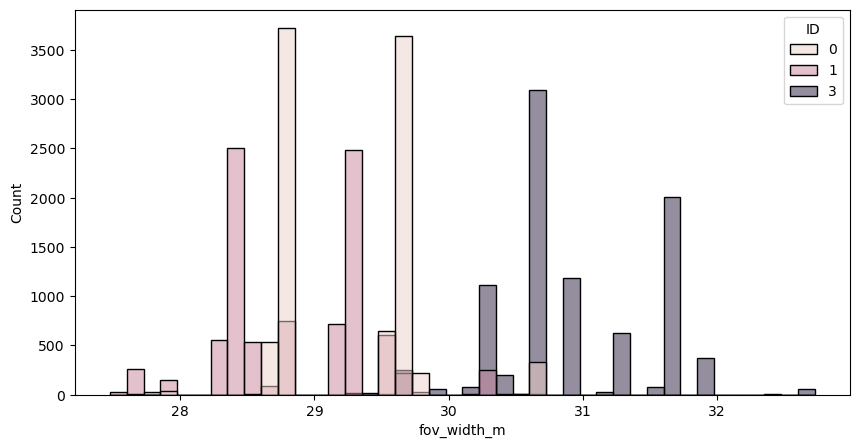

In [34]:
#histplot FOV width
f,ax =plt.subplots(1,1,figsize=(10,5))
sns.histplot(x='fov_width_m', hue='ID', data = merged_df,)


In [35]:
merged_df["fov_horizontal"] = 2 * np.arctan(merged_df["fov_width_m"] / (2 * merged_df["Abs_Alt"])) * 180 / np.pi  # in degrees
merged_df["fov_vertical"] = 2 * np.arctan(merged_df["fov_height_m"] / (2 * merged_df["Abs_Alt"])) * 180 / np.pi  # in degrees


In [38]:
merged_df.head()

,frame,ID,orientation,centroid_x,centroid_y,top_left_x,top_left_y,top_right_x,top_right_y,bottom_right_x,...,Latitude,Longitude,Rel_Alt,Abs_Alt,filename,fov_width_m,fov_height_m,fov_horizontal,fov_vertical,fov_diagonal
0,1,0,50.648784,1000,1022,986,1006,1017,1010,1015,...,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,28.674266,15.121195,60.671411,34.300014,66.975019
1,1,3,126.706330,815,1318,829,1301,834,1331,802,...,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,30.450521,16.057892,63.716877,36.289190,70.180213
2,1,1,42.224366,1082,1730,1099,1744,1067,1746,1066,...,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,27.876124,14.700300,59.271138,33.399131,65.494794
3,2,0,50.648784,1000,1022,986,1006,1017,1010,1015,...,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,28.674266,15.121195,60.671411,34.300014,66.975019
4,2,3,127.640171,816,1318,830,1301,834,1331,802,...,3.88809,72.81568,14.2,24.5,20240303_072251382_DJI_0264,31.481256,16.601444,65.439431,37.433272,71.984429


In [37]:
merged_df["fov_diagonal"] = 2 * np.arctan(
    np.sqrt(np.tan(np.radians(merged_df["fov_horizontal"] / 2))**2 + np.tan(np.radians(merged_df["fov_vertical"] / 2))**2)
) * 180 / np.pi  # converting to degrees

<Axes: xlabel='Rel_Alt', ylabel='bottom_pixel_distance'>

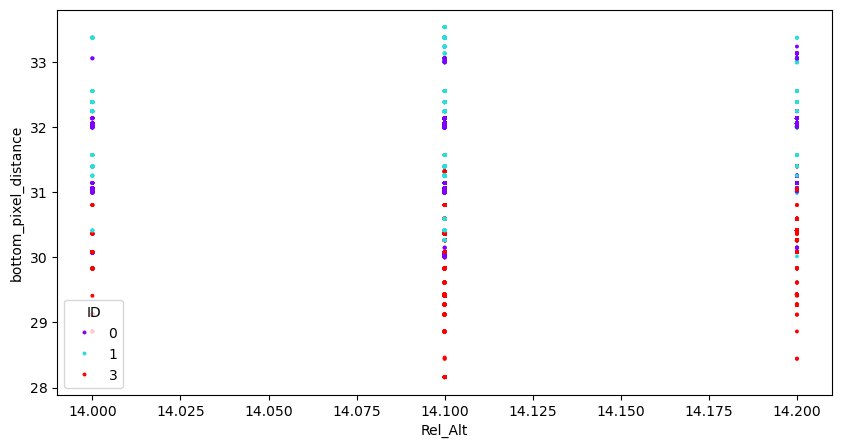

In [24]:
#Plot distance in pixel vs abs_alt
f,ax =plt.subplots(1,1,figsize=(10,5))
sns.scatterplot(x='Rel_Alt',y='bottom_pixel_distance',hue='ID', data = merged_df,linewidth=0,s=8,palette='rainbow')

<Axes: xlabel='ID', ylabel='bottom_pixel_distance'>

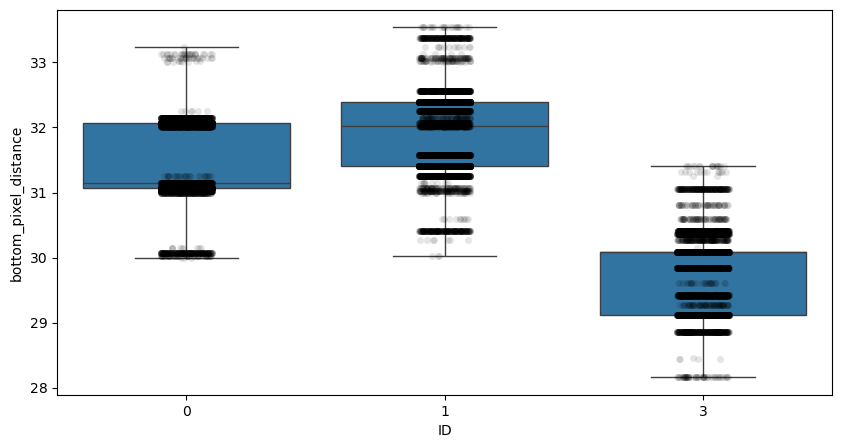

In [25]:
#Plot distance in pixel vs abs_alt
f,ax =plt.subplots(1,1,figsize=(10,5))
sns.boxplot(x='ID',y='bottom_pixel_distance', data = merged_df,)
sns.stripplot(x='ID',y='bottom_pixel_distance', data = merged_df,alpha=0.1,color='k')

<Axes: xlabel='ID', ylabel='Rel_Alt'>

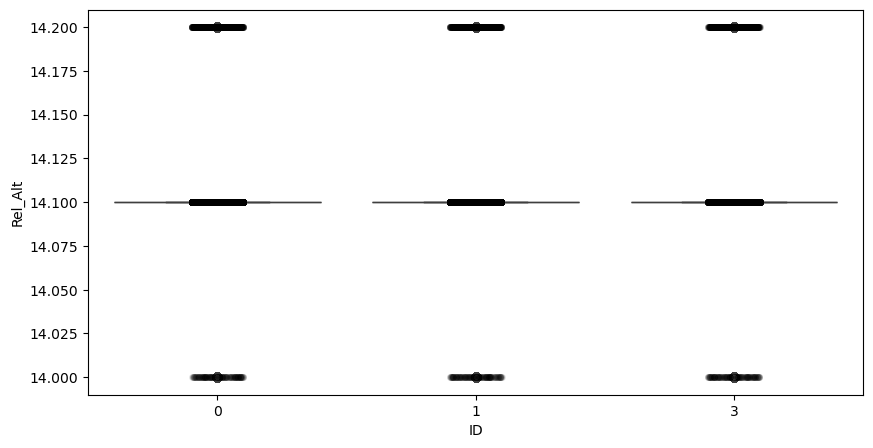

In [26]:
#Plot distance in pixel vs abs_alt
f,ax =plt.subplots(1,1,figsize=(10,5))
sns.boxplot(x='ID',y='Rel_Alt', data = merged_df,)
sns.stripplot(x='ID',y='Rel_Alt', data = merged_df,alpha=0.1,color='k')

## Correlation between Abs_Alt and the pixel distance for each Marker

In [1]:
merged_df3 = merged_df[merged_df['ID'].isin([3])]
merged_df3['Abs_Alt'].corr(merged_df3['bottom_pixel_distance'])

NameError: name 'merged_df' is not defined

In [26]:
merged_df0 = merged_df[merged_df['ID'].isin([0])]
merged_df0['Abs_Alt'].corr(merged_df0['bottom_pixel_distance'])

0.11029442618316951

In [27]:
merged_df1 = merged_df[merged_df['ID'].isin([1])]
merged_df1['Abs_Alt'].corr(merged_df1['bottom_pixel_distance'])

-0.00489019528388438

In [41]:
output_h5_path = "E:/sophia/files/videofiles/sequence_20240303_070126703_DJI_0257.h5"
merged_df.to_hdf(output_h5_path, key='df', mode='w')
print("[INFO] Data saved to HDF5 file.")

[INFO] Data saved to HDF5 file.
